# **Data**

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
from keras.utils import pad_sequences,plot_model
from sklearn import model_selection
from sklearn.metrics import classification_report,confusion_matrix
from string import printable
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.models import Model,load_model
from keras import regularizers
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten
from keras.layers import Input, ELU, LSTM, Embedding, BatchNormalization, Conv1D, MaxPooling1D,GRU,SimpleRNN
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
%matplotlib inline

In [2]:
import tensorboard
from datetime import datetime
from packaging import version

In [3]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [4]:
df=pd.read_csv('phishing_site_urls.csv')

In [5]:
df.shape

(549346, 2)

In [6]:
df['URL'][1]

'www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php'

In [7]:
df.shape
#smote function

(549346, 2)

In [8]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [9]:
df['Label'].value_counts()

Label
good    392924
bad     156422
Name: count, dtype: int64

C:\Users\Aaditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aaditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Aaditya\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Label', ylabel='count'>

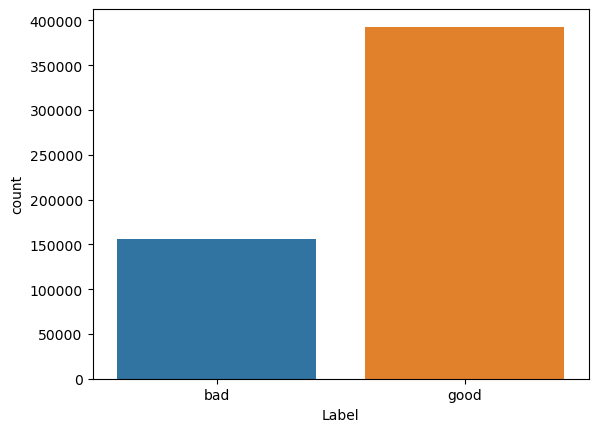

In [10]:
sns.countplot(x='Label', data=df)

In [11]:
df.loc[df["Label"] == "bad", "Label"] = 0
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,0
3,mail.printakid.com/www.online.americanexpress....,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,0


In [12]:
df.loc[df["Label"] == "good", "Label"] = 1
df.Label.value_counts()

Label
1    392924
0    156422
Name: count, dtype: int64

In [13]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,0
3,mail.printakid.com/www.online.americanexpress....,0
4,thewhiskeydregs.com/wp-content/themes/widescre...,0


# example preprocessing

In [14]:
printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [15]:
# character encoding using printable library in following way.

character_encoding=[printable.index(x) + 1 for x in printable]
for x in range(0,len(character_encoding)):
  print(printable[x],"=",character_encoding[x],"\n")

0 = 1 

1 = 2 

2 = 3 

3 = 4 

4 = 5 

5 = 6 

6 = 7 

7 = 8 

8 = 9 

9 = 10 

a = 11 

b = 12 

c = 13 

d = 14 

e = 15 

f = 16 

g = 17 

h = 18 

i = 19 

j = 20 

k = 21 

l = 22 

m = 23 

n = 24 

o = 25 

p = 26 

q = 27 

r = 28 

s = 29 

t = 30 

u = 31 

v = 32 

w = 33 

x = 34 

y = 35 

z = 36 

A = 37 

B = 38 

C = 39 

D = 40 

E = 41 

F = 42 

G = 43 

H = 44 

I = 45 

J = 46 

K = 47 

L = 48 

M = 49 

N = 50 

O = 51 

P = 52 

Q = 53 

R = 54 

S = 55 

T = 56 

U = 57 

V = 58 

W = 59 

X = 60 

Y = 61 

Z = 62 

! = 63 

" = 64 

# = 65 

$ = 66 

% = 67 

& = 68 

' = 69 

( = 70 

) = 71 

* = 72 

+ = 73 

, = 74 

- = 75 

. = 76 

/ = 77 

: = 78 

; = 79 

< = 80 

= = 81 

> = 82 

? = 83 

@ = 84 

[ = 85 

\ = 86 

] = 87 

^ = 88 

_ = 89 

` = 90 

{ = 91 

| = 92 

} = 93 

~ = 94 

  = 95 

	 = 96 


 = 97 

 = 98 

 = 99 

 = 100 



In [16]:
# example

url='https://www.apple.com/'
encoded=[printable.index(x) + 1 for x in url if x in printable]
print(encoded)

[18, 30, 30, 26, 29, 78, 77, 77, 33, 33, 33, 76, 11, 26, 26, 22, 15, 76, 13, 25, 23, 77]


# **Pre-processing**

In [18]:
#1) encoding the characters in URL from 1 to 100, using nested list comprehension.
url_encoded = [[printable.index(x) + 1 for x in url if x in printable] for url in df.URL]

In [19]:
#2)Length normalization, The length of all URL's normalized at fixed length, if the (url length< fixed length) zeroes are added at front of the url,
# if the (url length> fixed length) the etra character are intercepted from the end
max_len=75
X = pad_sequences(url_encoded, maxlen=max_len, truncating='post')

In [20]:
X.shape

(549346, 75)

In [21]:
y = np.array(df.Label)

# **Splitting-data**

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=33)
X_test, X_val, y_test, y_val = model_selection.train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [23]:
model = models.Sequential([
    layers.Input(shape=X_train.shape[1]),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(2, activation = 'relu'),
    layers.Dense(1, activation='sigmoid')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9728      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 4)                 36        
                                                                 
 dense_6 (Dense)             (None, 2)                 1

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
X_train = np.asarray(X_train).astype(np.float32)
X_val = np.asarray(X_val).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [28]:
X_train

array([[ 6.791132  ,  2.332711  ,  0.7313883 , ..., -0.8171056 ,
         0.77074844,  1.4612862 ],
       [-0.36425358, -0.3884847 , -0.38161582, ..., -1.4109876 ,
        -1.2975391 , -1.0863243 ],
       [-0.36425358, -0.3884847 , -0.38161582, ..., -0.6851318 ,
         3.5974083 , -0.5243514 ],
       ...,
       [-0.36425358, -0.3884847 , -0.38161582, ..., -0.8171056 ,
        -0.67705286, -0.22463256],
       [ 2.0208747 ,  3.1609008 ,  2.3503034 , ..., -0.553158  ,
        -0.67705286, -0.18716769],
       [ 2.6430824 ,  3.1609008 ,  2.6538498 , ...,  3.5380292 ,
        -0.2633953 , -0.4494217 ]], dtype=float32)

In [33]:
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [34]:
epochs = 30
batch_size = 32

his1=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val,y_val), callbacks=[early_stopping])

Epoch 1/30
13734/13734 [==============================] - 83s 6ms/step - loss: 0.2772 - accuracy: 0.8877 - val_loss: 0.3014 - val_accuracy: 0.8786
Epoch 2/30
13734/13734 [==============================] - 86s 6ms/step - loss: 0.2732 - accuracy: 0.8893 - val_loss: 0.3027 - val_accuracy: 0.8787
Epoch 3/30
13734/13734 [==============================] - 87s 6ms/step - loss: 0.2693 - accuracy: 0.8911 - val_loss: 0.2976 - val_accuracy: 0.8783
Epoch 4/30
13734/13734 [==============================] - 80s 6ms/step - loss: 0.2662 - accuracy: 0.8924 - val_loss: 0.2983 - val_accuracy: 0.8792
Epoch 5/30
13734/13734 [==============================] - 80s 6ms/step - loss: 0.2637 - accuracy: 0.8937 - val_loss: 0.3008 - val_accuracy: 0.8792
Epoch 6/30
13734/13734 [==============================] - 81s 6ms/step - loss: 0.2613 - accuracy: 0.8949 - val_loss: 0.2991 - val_accuracy: 0.8808
Epoch 7/30
13734/13734 [==============================] - 81s 6ms/step - loss: 0.2584 - accuracy: 0.8964 - val_loss: 0

In [ ]:
model.save('Mini_Proj.keras')

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

print('\nValidation Accuracy', test_accuracy, '\n')

In [ ]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=1)
print("accuracy on train data",train_accuracy)

In [ ]:
predictions=model.predict(X_test)

In [ ]:
predictions = (predictions>=0.5).astype(int)

In [ ]:
predictions.shape

In [ ]:
cm=confusion_matrix(y_test,predictions)
cm

In [ ]:
y_test.shape

In [ ]:
x=[]
for i in y_pred:
  x.append(np.argmax(i))
y_pred1=np.array(x)

In [ ]:
predictions.shape

In [ ]:
print(np.argmax(y_pred[22]))

In [ ]:
print(y_pred1[22])

In [ ]:
y_test[22]

In [ ]:
sns.heatmap(cm, annot=True, cmap='coolwarm',fmt='0.3f')
plt.ylabel("Actual value")
plt.xlabel("Predicted value")
plt.show()

In [ ]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
accuracy

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from keras.utils import plot_model
plot_model(model,show_shapes=True,to_file='gru_model.png')

In [ ]:
h1=his1.history
h1.keys()

In [ ]:
# summarize history for accuracy
plt.plot(h1['accuracy'])
plt.plot(h1['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(h1['loss'])
plt.plot(h1['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ***TESTING***

In [ ]:
def output_gru(url):
  gru_model=load_model("Mini_Proj.keras")
  encoded_url=[[printable.index(x) + 1 for x in url if x in printable]]
  max_len=75
  preprocessed_url = pad_sequences(encoded_url, maxlen=max_len, truncating='post')
  return np.argmax(gru_model.predict(preprocessed_url,batch_size=1)),gru_model.predict(preprocessed_url,batch_size=1)

In [ ]:
# Took a random website link from Phishtank which has all phishing links
output_gru('enterspages.com/QC/St-Leonard-apartment.html')

In [ ]:
cnn_gru_model=load_model("Mini_Proj.keras")

In [ ]:
cnn_gru_model.summary()

In [ ]:
cnn_gru_model.evaluate(X_train,y_train,verbose=1)

In [ ]:
test_url='https:\\www.google.com'
encoded_url=[[printable.index(x) + 1 for x in test_url if x in printable]]
max_len=75
encoded_url = np.asarray(encoded_url).astype(np.float32)
encoded_url = pad_sequences(encoded_url, maxlen=max_len, truncating='post')
cnn_gru_model.predict(encoded_url,batch_size=1)

In [ ]:
test_url='www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrcmd=_home-customer&nav=1/loading.php'
encoded_url=[[printable.index(x) + 1 for x in test_url if x in printable]]
max_len=75
encoded_url = np.asarray(encoded_url).astype(np.float32)
encoded_url = pad_sequences(encoded_url, maxlen=max_len, truncating='post')
cnn_gru_model.predict(encoded_url,batch_size=1)